<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Lecture10_Statistics2/Hypothesis_Testing_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
from scipy import stats
from scipy.stats.distributions import chi2

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/titanic.csv')
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


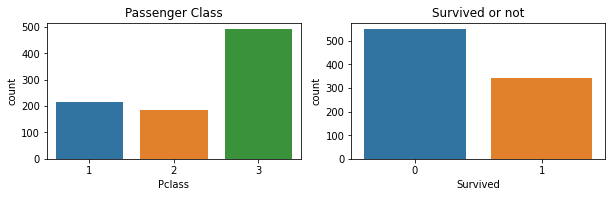

In [ ]:
plt.figure(figsize=(10,2.5))

plt.subplot(121)
sns.countplot(data = df, x='Pclass')
plt.title("Passenger Class")

plt.subplot(122)
sns.countplot(data = df, x='Survived')
plt.title("Survived or not")

plt.show()

In [ ]:
PClass_survd = pd.pivot_table(df,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


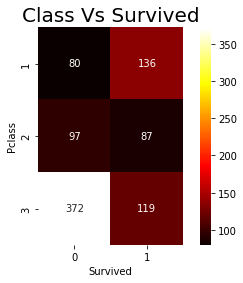

In [ ]:
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()

In [ ]:
pct_class = PClass_survd.sum(axis=1)/891
pct_class

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

24% of total passengers in Class 1, <br>
20.65% of total passengers in Class 2 <br>
remaining 55.11% in Class 3.

In [ ]:
pct_survived = PClass_survd.sum(axis=0)/891
pct_survived

Survived
0    0.616162
1    0.383838
dtype: float64

61.62% of total passeneger survived

Null hypothesis: The survival does not depend on the class the passengers were travelling.

If this is true then we expect the distributions to have the same proportions in all columns, i.e.


In [ ]:
# This is the number of people in all classes and survival history expected.
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


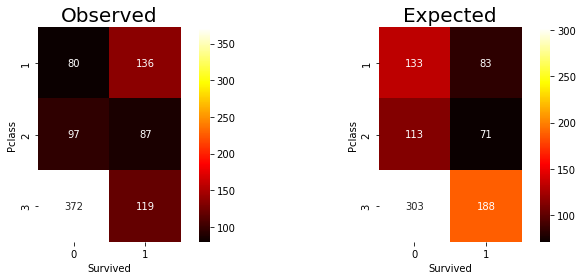

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

In [ ]:
# Let's the chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PClass_survd)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  102.88898875696056
P value is 4.549251711298793e-23
Degrees of Freedom: 2


P value is almost 0! we can reject the null hypothesis with confidence!

### Exercise Time
Null Hypothesis: Survival rate is independant to Sex of a passenger.

Should we accept it or reject it?



In [ ]:
from scipy.stats import chi2_contingency

groupedby_genderval = df.groupby('Survived')['Sex'].value_counts()
pivot_cont = pd.pivot_table(df[['Survived', 'Sex']], index = ['Survived'],columns = 'Sex', aggfunc = len)
pivot_cont

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
chi2, pval, dof, expected = chi2_contingency(pivot_cont)

print('Chi-Squared value: ', chi2)
print('Probability for such a large value:',pval)

Chi-Squared value:  260.71702016732104
Probability for such a large value: 1.1973570627755645e-58


# T-Test

### Example-1

Acme Ltd. wants to improve sales performance. Past sales data indicate that the average sale was 100 dollars per transaction. After training the sales force, recent sales data (from a random sample of 25 salesmen) is shown below:

In [ ]:
a = [122.09, 100.64, 125.77, 120.32, 118.25,  
    96.47, 111.4 ,  80.66, 110.77, 111.14, 
    102.9, 114.54,  88.09,  98.59,  87.07, 
   110.43, 101.9 , 123.89,  97.03, 116.23, 
    108.3, 112.82, 119.57, 131.38, 128.39]

In [ ]:
stats.ttest_1samp(a, 100, axis=0, nan_policy='propagate')

Ttest_1sampResult(statistic=3.578139767278185, pvalue=0.0015178945415114085)

### Example-2
Compare two unrelated samples. Data was collected on the weight loss of 16 women and 20 men enrolled in a weight reduction program.
At $\alpha$ = 0.05, test whether the weight loss of these two samples is different.

In [ ]:
Weight_loss_Male   = [ 3.69, 4.12, 4.65, 3.19,  4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92]
Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

#### Step 1: Define null and alternative hypotheses
In testing whether weight reduction of female and male are same,the null hypothesis states that mean weight reduction, $\mu{M}$ equals $\mu{F}$. The alternative hypthesis states that the weight reduction is different for Male and Female, $\mu{M}$ $\neq$ $\mu{F}$

* $H_0$: $\mu{M}$ - $\mu{F}$ =      0
* $H_A$: $\mu{M}$ - $\mu{F}$ $\neq$  0

#### Step 2: Decide the significance level
Here we select $\alpha$ = 0.05 and sample size < 30 and population standard deviation is not known.

#### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are not same.
* The sample is not a large sample, n < 30. So you use the t distribution and the `t-STAT` test statistic for two sample unpaired test.

### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [ ]:
t_statistic, p_value  =  stats.ttest_ind(Weight_loss_Male,Weight_loss_Female)
print('P Value %1.3f' % p_value)    

P Value 0.076


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.076 and it is more than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

### So there is no sufficient evidence  to reject the null hypothesis that the weight loss of these men and women is same.